# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muh. Irsyad Asrori
- **Email:** sastrojendro1119@gmail.com
- **ID Dicoding:** sastrojendro1119

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren penyewaan sepeda sepanjang tahun?
2. Berapa rata-rata penggunaan sepeda setiap jam?
3. Apakah cuaca dan musim mempengaruhi jumlah penyewaan sedepa?
4. Berapa perbandingan pengguna sepeda Casual dan Registered?

## Import Semua Packages/Library yang Digunakan

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [197]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [198]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- xxx
- xxx

### Assessing Data

#### Menilai tabel `day_df`

In [199]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- xxx
- xxx

In [200]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [201]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [202]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [203]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [204]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
406,407,2012-02-11,1,1,2,0,6,0,3,0.224167,0.210867,0.731250,0.289796,192,1977,2169
595,596,2012-08-18,3,1,8,0,6,0,1,0.678333,0.618071,0.603333,0.177867,2827,5038,7865
178,179,2011-06-28,3,0,6,0,2,1,1,0.744167,0.692558,0.634167,0.144283,732,3916,4648
159,160,2011-06-09,2,0,6,0,4,1,2,0.808333,0.757579,0.568333,0.149883,563,3352,3915
613,614,2012-09-05,3,1,9,0,3,1,1,0.736667,0.708983,0.741250,0.187808,832,6280,7112


#### Menilai tabel `hour_df`

In [205]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [206]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [207]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [208]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [209]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [210]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
15597,15598,2012-10-17,4,1,10,2,0,3,1,1,0.38,0.3939,0.76,0.0000,4,12,16
13906,13907,2012-08-07,3,1,8,15,0,2,1,1,0.80,0.7424,0.52,0.0000,100,206,306
7839,7840,2011-11-28,4,0,11,7,0,1,1,1,0.42,0.4242,0.88,0.0000,7,270,277
10751,10752,2012-03-29,2,1,3,2,0,4,1,1,0.60,0.6061,0.28,0.2985,0,6,6
15730,15731,2012-10-22,4,1,10,15,0,1,1,1,0.64,0.6212,0.29,0.1642,74,222,296


### Cleaning Data

#### Membersihkan tabel `day_df`

In [211]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


##### Memperbaiki tipe data

In [212]:
datetime_columns = ["dteday"]
for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])

In [213]:
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
day_df[categorical_cols] = day_df[categorical_cols].astype('category')

In [214]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

**Insight:**
- xxx
- xxx

#### Membersihkan tabel `hour_df`

In [215]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


##### Mempeebaiki tipe data

In [216]:
datetime_columns = ["dteday"]
for column in datetime_columns:
    hour_df[column] = pd.to_datetime(hour_df[column])

In [217]:
hour_df[categorical_cols] = hour_df[categorical_cols].astype('category')

In [218]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

#### Labeling

In [219]:
nama_musim = {1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'}

day_df.season.replace(nama_musim, inplace=True)
hour_df.season.replace(nama_musim, inplace=True)

<ipython-input-219-a170fabda53c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.season.replace(nama_musim, inplace=True)
<ipython-input-219-a170fabda53c>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df.season.replace(nama_musim, inplace=True)
<ipython-input-219-a170fabda53c>:4: FutureWarning: A valu

In [220]:
nama_bulan = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'Mei', 6: 'Jun',
    7: 'Jul', 8: 'Agu', 9: 'Sep', 10: 'Okt', 11: 'Nov', 12: 'Des'
}

day_df['mnth'].replace(nama_bulan, inplace=True)
hour_df['mnth'].replace(nama_bulan, inplace=True)

<ipython-input-220-a4e14d95d01f>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df['mnth'].replace(nama_bulan, inplace=True)
<ipython-input-220-a4e14d95d01f>:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df['mnth'].replace(nama_bulan, inplace=True)
<ipython-input-220-a4e14d95d01f>:7: FutureWarning: A va

In [221]:
kondisi_cuaca = {
    1: 'Cerah',
    2: 'Berkabut',
    3: 'Hujan/Salju Ringan',
    4: 'Hujan/Salju Lebat'
}

day_df['weathersit'].replace(kondisi_cuaca, inplace=True)
hour_df['weathersit'].replace(kondisi_cuaca, inplace=True)

<ipython-input-221-ed0e439350da>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df['weathersit'].replace(kondisi_cuaca, inplace=True)
<ipython-input-221-ed0e439350da>:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df['weathersit'].replace(kondisi_cuaca, inplace=True)
<ipython-input-221-ed0e439350da>:9: F

In [222]:
nama_hari = {
    0: 'Minggu',
    1: 'Senin',
    2: 'Selasa',
    3: 'Rabu',
    4: 'Kamis',
    5: 'Jumat',
    6: 'Sabtu'
}

day_df['weekday'].replace(nama_hari, inplace=True)
hour_df['weekday'].replace(nama_hari, inplace=True)

<ipython-input-222-169449ab2202>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df['weekday'].replace(nama_hari, inplace=True)
<ipython-input-222-169449ab2202>:11: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df['weekday'].replace(nama_hari, inplace=True)
<ipython-input-222-169449ab2202>:12: FutureWarnin

In [223]:
day_df.yr.replace((0,1), ('2011','2012'), inplace=True)
hour_df.yr.replace((0,1), ('2011','2012'), inplace=True)

<ipython-input-223-bc05f806deda>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.yr.replace((0,1), ('2011','2012'), inplace=True)
<ipython-input-223-bc05f806deda>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df.yr.replace((0,1), ('2011','2012'), inplace=True)
<ipython-input-223-bc05f806deda>:2: Futur

In [224]:
day_df.sample(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
69,70,2011-03-11,Musim Semi,2011,Mar,0,Jumat,1,Berkabut,0.316522,0.305000,0.649565,0.232970,247,1730,1977
418,419,2012-02-23,Musim Semi,2012,Feb,0,Kamis,1,Cerah,0.454167,0.444446,0.554583,0.190913,516,4546,5062
214,215,2011-08-03,Musim Gugur,2011,Agu,0,Rabu,1,Berkabut,0.731667,0.679937,0.657500,0.135583,467,3107,3574


In [225]:
hour_df.sample(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4780,4781,2011-07-23,Musim Gugur,2011,Jul,2,0,Sabtu,0,Cerah,0.82,0.7727,0.52,0.0000,13,48,61
16845,16846,2012-12-09,Musim Dingin,2012,Des,16,0,Minggu,0,Hujan/Salju Ringan,0.36,0.3485,0.93,0.1642,33,220,253
8323,8324,2011-12-18,Musim Dingin,2011,Des,11,0,Minggu,0,Berkabut,0.24,0.2273,0.60,0.2239,20,168,188


Dari kedua sampel tersebut terlihat bahwa proses labeling telah berhasil

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [226]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731,731.0,731,731.0,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,2.0,7,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Musim Gugur,2012,Jan,0.0,Minggu,1.0,Cerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,710.0,105,500.0,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dari tabel tersebut dapat dilihat bahwa dataset berisi 731 baris data yang merepresentasikan jumlah penyewaan sepeda per hari selama dua tahun (2011-2012). Yang mana jumlah sepeda disewa paling banyak yaitu sebanyak 8714 unit dan paling sedikit 22

In [227]:
# Menghitung Koefisien Variasi menggunakan rumus (standar deviasi/mean * 100)
day_df.instant.std() / day_df.instant.mean() * 100

np.float64(57.69557694720976)

Dari hasil perhitungan ini data penggunaan sepeda setiap harinya cukup fluktuatif

In [228]:
day_df[day_df.cnt == day_df.cnt.max()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
623,624,2012-09-15,Musim Gugur,2012,Sep,0,Sabtu,0,Cerah,0.608333,0.585867,0.501667,0.247521,3160,5554,8714


Penggunaan sepeda paling banyak terjadi pada Sabtu, 15-09-2012 sebanyak 8714 unit

In [229]:
day_df[day_df.cnt == day_df.cnt.min()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
667,668,2012-10-29,Musim Dingin,2012,Okt,0,Senin,1,Hujan/Salju Ringan,0.44,0.4394,0.88,0.3582,2,20,22


Penggunaan sepeda paling sedikit pada Senin, 29-10-2012 sebanyak 22 unit

In [230]:
day_df.groupby(["yr","season"]).agg({
    "cnt": ["max","min","sum",]
})

<ipython-input-230-e31f02db044f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(["yr","season"]).agg({


cnt              
                    max   min     sum
yr   season                          
2011 Musim Semi    3239   431  150000
     Musim Panas   5805   795  347316
     Musim Gugur   6043  1115  419650
     Musim Dingin  5511   627  326137
2012 Musim Semi    7836   441  321348
     Musim Panas   8362  1027  571273
     Musim Gugur   8714  4073  641479
     Musim Dingin  8555    22  515476

Musim panas cenderung memiliki penyewaan tertinggi dibandingkan musim lainnya. Musim dingin memiliki jumlah penyewaan lebih rendah, kemungkinan karena cuaca lebih ekstrem. Tahun 2012 memiliki jumlah penyewaan yang lebih tinggi dibandingkan 2011, menunjukkan tren peningkatan penggunaan sepeda dari tahun ke tahun.

In [231]:
day_df.groupby(["yr","mnth"]).agg({
    "cnt": ["max","min","sum"]
})

<ipython-input-231-93b432aa2a5c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(["yr","mnth"]).agg({


cnt              
            max   min     sum
yr   mnth                    
2011 Jan   1985   431   38189
     Feb   2927  1005   48215
     Mar   3239   605   64045
     Apr   5312   795   94870
     Mei   5805  2633  135821
     Jun   5515  3767  143512
     Jul   6043  3285  141341
     Agu   5895  1115  136691
     Sep   5423  1842  127418
     Okt   5511   627  123511
     Nov   4486  1495  102167
     Des   3940   705   87323
2012 Jan   4521  1301   96744
     Feb   5062  1529  103137
     Mar   8362  3194  164875
     Apr   7460  1027  174224
     Mei   8294  2843  195865
     Jun   8120  4127  202830
     Jul   8173  4459  203607
     Agu   7865  4549  214503
     Sep   8714  4073  218573
     Okt   8156    22  198841
     Nov   6852  2277  152664
     Des   6606   441  123713

Penyewaan sepeda meningkat di musim panas (Juni-Agustus) dan menurun di musim dingin (Desember-Februari). Tahun 2012 menunjukkan peningkatan jumlah penyewaan dibandingkan 2011, menandakan tren penggunaan sepeda yang naik. Setiap bulan memiliki fluktuasi penyewaan yang signifikan, kemungkinan dipengaruhi oleh cuaca atau hari libur.

In [232]:
day_df.groupby(["yr","mnth"]).agg({
    "casual": ["sum"],
    "registered": ["sum"],
})

<ipython-input-232-f558ec200f95>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(["yr","mnth"]).agg({


casual registered
             sum        sum
yr   mnth                  
2011 Jan    3073      35116
     Feb    6242      41973
     Mar   12826      51219
     Apr   22346      72524
     Mei   31050     104771
     Jun   30612     112900
     Jul   36452     104889
     Agu   28842     107849
     Sep   26545     100873
     Okt   25222      98289
     Nov   15594      86573
     Des    8448      78875
2012 Jan    8969      87775
     Feb    8721      94416
     Mar   31618     133257
     Apr   38456     135768
     Mei   44235     151630
     Jun   43294     159536
     Jul   41705     161902
     Agu   43197     171306
     Sep   43778     174795
     Okt   34538     164303
     Nov   21009     131655
     Des   13245     110468

Data diatas merupakan perbandingan penggunaan sepeda antara pengguna casual dan registered (member) pada setiap bulan

**Insight:**
- xxx
- xxx

### Eksplore hour_df

In [233]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379.0,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,2.0,7,2.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Musim Gugur,2012,Jul,NaN,0.0,Sabtu,1.0,Cerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,16879.0,2512,11865.0,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [234]:
# Menghitung Koefisien Variasi menggunakan rumus (standar deviasi/mean * 100)
day_df.instant.std() / day_df.instant.mean() * 100

np.float64(57.69557694720976)

Perhitungan ini menunjukkan data penggunaan sepeda setiap harinya cukup fluktuatif

In [235]:
hour_df.groupby(["hr"]).agg({
    "cnt": ["sum"]
}).sort_values(by=[('cnt', 'sum')], ascending=False)

,cnt
,sum
hr,
17,336860
18,309772
8,261001
16,227748
19,226789
13,184919
12,184414
15,183149


Data tersebut menampilkan hasil jumlah sewa sepeda terbanyak pada jam 17 sebanyak 336860 unit

In [236]:
hour_df.groupby("hr")[[
    "casual", "registered", "cnt"
]].mean()

,casual,registered,cnt
hr,,,
0,10.158402,43.739669,53.898072
1,6.504144,26.871547,33.375691
2,4.772028,18.097902,22.869930
3,2.715925,9.011478,11.727403
4,1.253945,5.098996,6.352941
5,1.411437,18.478382,19.889819
6,4.161379,71.882759,76.044138
7,11.055021,201.009629,212.064649
8,21.679505,337.331499,359.011004


Data diatas merupakan tampilan rata-rata jumlah penggunaan sepeda (cnt) pada jam tertentu (hr) berdasarkan pengguna casual dan registered

## Visualization & Explanatory Analysis

### 1. Bagaimana tren penyewaan sepeda sepanjang tahun?

<ipython-input-237-6308abc6d305>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_df = day_df.groupby(["yr", "mnth"])["cnt"].mean().reset_index()


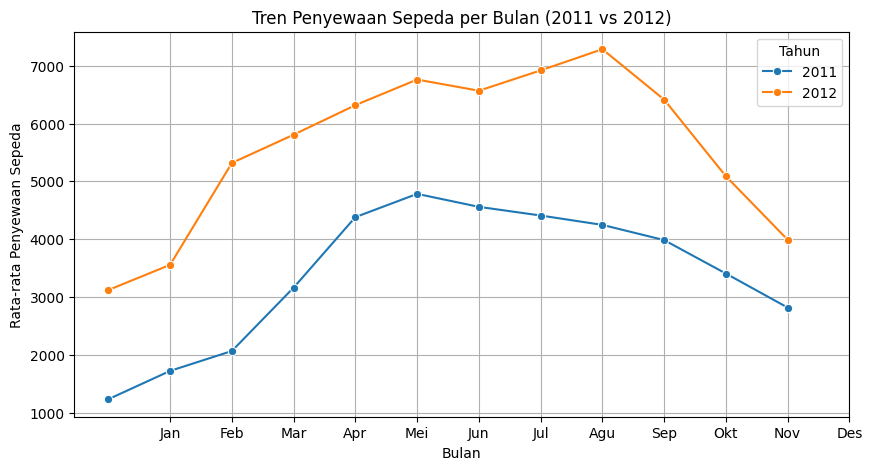

In [237]:
# Group data berdasarkan bulan dan hitung rata-rata penyewaan
monthly_df = day_df.groupby(["yr", "mnth"])["cnt"].mean().reset_index()

# Visualisasi
plt.figure(figsize=(10,5))
sns.lineplot(x="mnth", y="cnt", hue="yr", data=monthly_df, marker="o")

# Mengatur label dan judul
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Tren Penyewaan Sepeda per Bulan (2011 vs 2012)")
plt.legend(title="Tahun")
plt.grid()
plt.show()

#### 2. Berapa rata-rata penggunaan sepeda setiap jam?

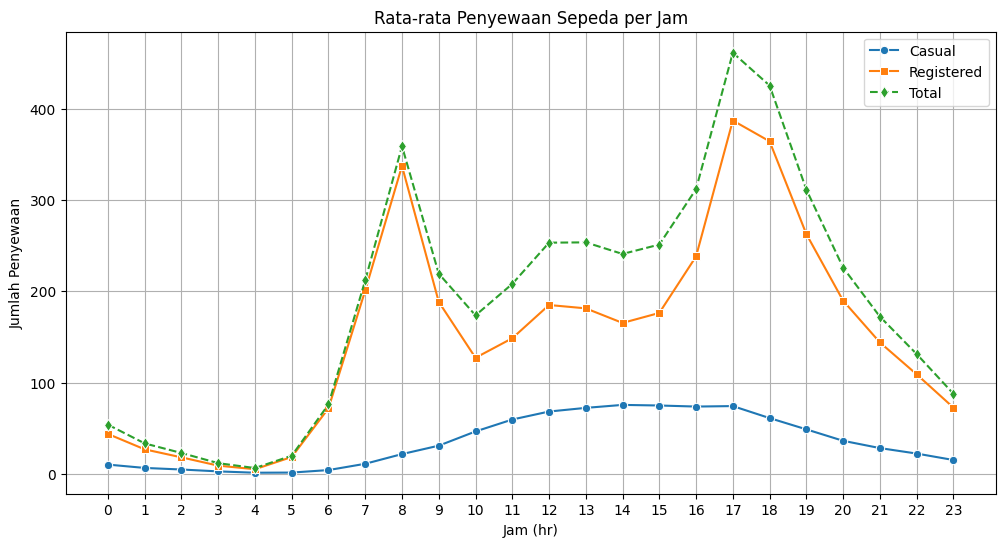

In [238]:
# Group data berdasarkan jam dan hitung rata-rata penyewaan
hourly_df = hour_df.groupby("hr")[["casual", "registered", "cnt"]].mean()

# Visualisasi
plt.figure(figsize=(12,6))
sns.lineplot(x=hourly_df.index, y=hourly_df["casual"], label="Casual", marker="o")
sns.lineplot(x=hourly_df.index, y=hourly_df["registered"], label="Registered", marker="s")
sns.lineplot(x=hourly_df.index, y=hourly_df["cnt"], label="Total", marker="d", linestyle="--")

plt.title("Rata-rata Penyewaan Sepeda per Jam")
plt.xlabel("Jam (hr)")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(range(0,24))
plt.legend()
plt.grid()
plt.show()

### 3. Apakah cuaca dan musim mempengaruhi jumlah penyewaan sedepa?

<ipython-input-239-ab4fa295b0f5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_avg = day_df.groupby("season")["cnt"].mean().reset_index()
<ipython-input-239-ab4fa295b0f5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="cnt", data=season_avg, palette="coolwarm")


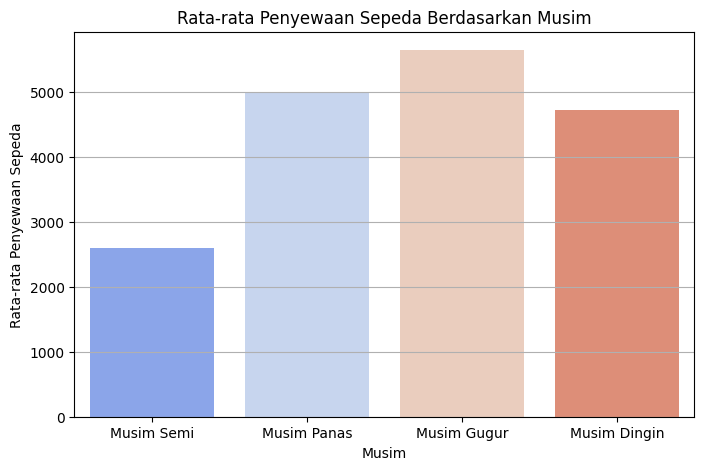

In [239]:
# Menghitung rata-rata penyewaan berdasarkan musim
season_avg = day_df.groupby("season")["cnt"].mean().reset_index()

# Membuat bar chart
plt.figure(figsize=(8,5))
sns.barplot(x="season", y="cnt", data=season_avg, palette="coolwarm")

# Mengatur label dan judul
plt.xlabel("Musim")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim")
plt.grid(axis="y")

# Menampilkan grafik
plt.show()

<ipython-input-240-fb33d181603c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_df = day_df.groupby("weathersit")["cnt"].mean().sort_values()
<ipython-input-240-fb33d181603c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_df.index, y=weather_df.values, palette="coolwarm")


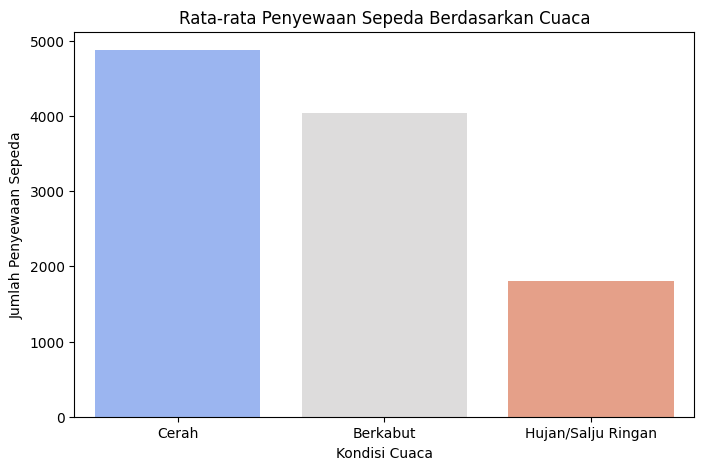

In [240]:
# Group berdasarkan kondisi cuaca dan hitung rata-rata penyewaan
weather_df = day_df.groupby("weathersit")["cnt"].mean().sort_values()

# Visualisasi
plt.figure(figsize=(8,5))
sns.barplot(x=weather_df.index, y=weather_df.values, palette="coolwarm")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

### 4. Berapa perbandingan pengguna sepeda Casual dan Registered

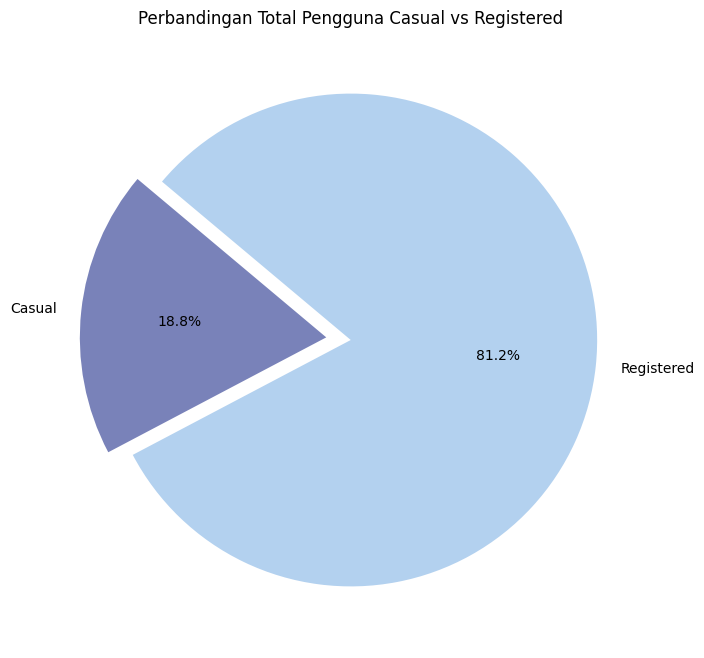

In [241]:
# Menghitung total pengguna casual dan registered
total_casual = day_df["casual"].sum()
total_registered = day_df["registered"].sum()

# Menyiapkan data
labels = ["Casual", "Registered"]
sizes = [total_casual, total_registered]
colors = ["#7982B9", "#B3D1EF"]
explode = (0.1, 0)  # Memisahkan bagian casual agar lebih menonjol

# Membuat pie chart
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, explode=explode, startangle=140)

# Menambahkan judul
plt.title("Perbandingan Total Pengguna Casual vs Registered")

# Menampilkan grafik
plt.show()

## Analisis Lanjutan (Opsional)

In [242]:
# Menentukan kategori waktu
def categorize_hour(hr):
    if 0 <= hr < 6:
        return "Dini Hari"
    elif 6 <= hr < 12:
        return "Pagi"
    elif 12 <= hr < 18:
        return "Siang"
    else:
        return "Malam"

# Menambahkan kolom kategori waktu
hour_df["time_category"] = hour_df["hr"].apply(categorize_hour)

# Melihat jumlah penyewaan per kategori waktu
hour_df.groupby("time_category")["cnt"].mean()

,cnt
time_category,
Dini Hari,24.908559
Malam,225.757555
Pagi,208.100688
Siang,295.483886


<ipython-input-243-91c044e75cff>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="time_category", y="cnt", data=time_segmentation, order=order, palette="coolwarm")


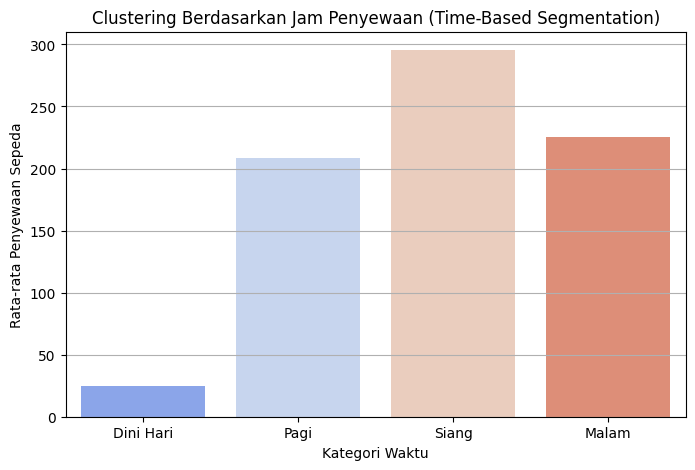

In [243]:
# Mengelompokkan data berdasarkan kategori waktu dan menghitung rata-rata penyewaan
time_segmentation = hour_df.groupby("time_category")["cnt"].mean().reset_index()

# Urutkan kategori waktu agar tidak acak dalam grafik
order = ["Dini Hari", "Pagi", "Siang", "Malam"]

# Membuat bar chart
plt.figure(figsize=(8,5))
sns.barplot(x="time_category", y="cnt", data=time_segmentation, order=order, palette="coolwarm")

# Mengatur label dan judul
plt.xlabel("Kategori Waktu")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Clustering Berdasarkan Jam Penyewaan (Time-Based Segmentation)")
plt.grid(axis="y")

# Menampilkan grafik
plt.show()

Penyewaan sepeda paling rendah terjadi pada Dini Hari (00:00 - 05:59). Hal ini wajar karena pada jam-jam tersebut, aktivitas luar ruangan sangat minim, dan sebagian besar orang sedang beristirahat.

Penyewaan mulai meningkat pada Pagi Hari (06:00 - 11:59), terutama karena banyak pengguna sepeda yang menggunakannya sebagai moda transportasi untuk berangkat kerja atau sekolah.

Puncak penyewaan terjadi pada Siang hingga Sore Hari (12:00 - 17:59). Ini kemungkinan disebabkan oleh kombinasi aktivitas rekreasi, perjalanan pulang kerja yang lebih fleksibel, serta peningkatan jumlah pengguna casual.

Pada Malam Hari (18:00 - 23:59), penyewaan masih cukup tinggi, tetapi mulai menurun setelah jam sibuk sore berakhir. Beberapa pengguna mungkin masih menggunakan sepeda untuk perjalanan pulang, namun jumlahnya lebih sedikit dibandingkan siang hari.

## Conclusion

1. Musim panas (Juni - Agustus) adalah periode dengan penyewaan tertinggi. Tahun 2012 menunjukkan pertumbuhan bisnis dibandingkan 2011, artinya tren penyewaan semakin meningkat. Berdasarkan pola ini, kita bisa memprediksi bahwa mulai bulan Juni - Agustus di tahun berikutnya akan menjadi periode puncak penyewaan. Pemilik bisnis sepeda bisa meningkatkan persediaan atau staf operasional saat musim panas.

2. Penyewaan sepeda menunjukkan dua puncak utama, yaitu pada pagi hari sekitar pukul 07:00 - 09:00 dan sore hari sekitar pukul 17:00 - 19:00. Lonjakan ini sangat terlihat pada pengguna registered, yang kemungkinan besar adalah pekerja atau pelajar yang menggunakan sepeda sebagai moda transportasi utama untuk berangkat dan pulang dari tempat kerja atau sekolah. Di sisi lain, pola yang berbeda terlihat pada pengguna casual. Tidak seperti pengguna registered yang memiliki puncak penyewaan pada jam sibuk pagi dan sore, pengguna casual lebih aktif menyewa sepeda setelah pukul 10:00 pagi dan puncaknya terjadi di sore hingga malam hari sekitar pukul 14:00 - 20:00. Hal ini menunjukkan bahwa pengguna casual lebih cenderung menggunakan sepeda untuk keperluan rekreasi atau perjalanan santai dibandingkan sebagai moda transportasi utama untuk aktivitas rutin seperti bekerja atau sekolah.

3. Musim Semi sering memiliki cuaca yang tidak menentu, termasuk hujan ringan hingga sedang, suhu yang masih dingin, dan angin kencang sehingga menyebabkan turunnya minat penyewa sepeda. Musim Panas memiliki penyewaan tertinggi karena cuaca hangat dan lebih banyak aktivitas luar ruangan. Musim Gugur juga cukup tinggi karena suhu masih nyaman untuk bersepeda sebelum masuk musim dingin.

4. Berdasarkan pie chart yang menampilkan perbandingan total pengguna casual dan registered, terlihat bahwa pengguna registered mendominasi jumlah penyewaan sepeda dibandingkan dengan pengguna casual. Hal ini menunjukkan bahwa mayoritas pelanggan layanan penyewaan sepeda adalah pengguna tetap yang telah terdaftar dalam sistem, kemungkinan besar menggunakan sepeda sebagai moda transportasi rutin untuk bekerja atau beraktivitas sehari-hari. Sementara itu, pengguna casual hanya menyumbang sebagian kecil dari total penyewaan sepeda. Pengguna ini kemungkinan besar adalah wisatawan, penduduk lokal yang hanya menyewa sesekali, atau mereka yang menggunakan sepeda untuk tujuan rekreasi. Dalam pie chart ini, bagian casual sengaja dibuat lebih menonjol (explode=0.1) untuk menekankan proporsi mereka yang lebih kecil dibandingkan pengguna registered.